In [316]:
import numpy as np
import pandas as pd
import json
import re as re
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
import ast
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam
# from keras.layers import Dropout

%matplotlib inline


from preprocess import preprocess #not working for some reason

In [102]:
#remove once import is corrected
def preprocess (strng):
    replace_list = ['peeled', 'fresh', 'ground', 'chopped', 'seeds', 'frozen',
                    'plain', 'light','heavy','dark', 'roasted', 'diced','cooked',
                    'pitted', 'canned', 'unsweeetened', 'sweetened', 'low',
                    'reduced','sodium','skim', 'part-skim', 'whole', 'low-fat',
                    'extra', 'extra-virgin','leaves', 'leaf', 'leaves','crumbles',
                    'powder','yellow', 'kosher', 'boneless', 'skinless', 'grilled',
                    'shredded', 'peeled', 'coarse', 'reduced', 'all-purpose', 'red',
                    'white', 'oven-ready', 'reduced-fat', 'thread', 'dried', 'dry',
                    'fat', 'free', 'finely', 'firmly', 'freshly', '1%', '2%', 'for',
                    'dusting', 'seasoned', 'sliced', 'slivered', 'soft', 'softened',
                    'small', 'toasted', 'unsweetened', 'pod', 'pods','cube','granule',
                    'floret','fine', 'baby', 'lower', 'lump', 'halves', 'lowfat',
                    'slices', 'all', 'purpose', 'unbleached', 'bone-in', 'granule',
                    'whole-milk', 'asian', 'sprigs', 'stem', 'cubes', 'granules', 'in',
                    'crumbled', 'crushed', 'blend', 'boneless', 'bottled', 'florets',
                    'california', 'chunky', 'flavored', 'cooking', 'baked', 'thai',
                    'store', 'bought', 'steamed', 'stewed', 'unsalted', 'unflavored',
                    'vietnamese', 'organic', 'cap', 'concentrate', 'packed', 'boiling',
                    'deveined', 'fat-free', 'self', 'rising', 'self-rising', 'instant',
                    'of', 'grated'
                   ]
    return_strng = ''
    strng = strng.lower()
    for w in strng.split():
        if w in replace_list:
            w = ''
        else:
            w = re.sub('oes$', 'o', w)
            w = re.sub('s$', '', w)           
        return_strng += w + ' '
        
    return_strng = re.sub('"', '', return_strng)
    return_strng = re.sub(',', '', return_strng)
    return_strng = re.sub('chilie', 'chile', return_strng)
    return_strng = re.sub('chillie', 'chile', return_strng)
    return_strng = re.sub('yoghurt', 'yogurt', return_strng)
    return_strng = re.sub('won ton ', 'wonton', return_strng)
    return_strng = re.sub('whipping', 'whipped', return_strng)
    return_strng = re.sub('anchovie', 'anchovy', return_strng)
    return_strng = re.sub('artichok heart marin', 'artichoke heart', return_strng)
    return_strng = re.sub('colouring', 'coloring', return_strng)
    return_strng = re.sub('hellmann\' or best food real mayonnai', 'mayonaise', return_strng)
    return_strng = re.sub('mayonnaise', 'mayonaise', return_strng)
    return_strng = re.sub('wontonwrapper', 'wonton wrapper', return_strng)
    return_strng = re.sub('filet', 'fillet', return_strng) 
    return_strng = re.sub('-', ' ', return_strng) 
    return_strng = return_strng.strip()
    return_strng = re.sub('  ', ' ', return_strng)
    return(return_strng)

## 1. Load Ingredient List
The csv ingredient_counts_edited2 is the final csv produced in notebook1, with some
additional manual cleaning

In [103]:
df = pd.read_csv('ingredient_counts_edited2.csv')

In [104]:
#df.head(100)

drop nulls and duplicates, look at the list

In [105]:
df.dropna(inplace=True)

In [106]:
ingredient_list = list(df['Ingredient2'])

In [107]:
len(ingredient_list)

957

In [108]:
ingredient_list = set(ingredient_list)

In [109]:
len(ingredient_list)

917

In [110]:
ingredient_list

{' mozzarella',
 '& half',
 'active yeast',
 'adobo sauce',
 'agave nectar',
 'alfredo sauce',
 'allspice',
 'almond',
 'almond extract',
 'almond flour',
 'almond milk',
 'amchur',
 'american cheese',
 'anaheim chile',
 'ancho',
 'ancho chile pepper',
 'anchovy',
 'anchovy paste',
 'andouille sausage',
 'angel hair',
 'anise',
 'anise seed',
 'apple',
 'apple cider',
 'apple juice',
 'apricot',
 'arborio rice',
 'artichoke',
 'artichoke heart',
 'arugula',
 'asafetida',
 'asafoetida',
 'asiago',
 'asparagu',
 'asparagu spear',
 'avocado',
 'bacon',
 'bacon dripping',
 'baguette',
 'baking',
 'baking potato',
 'baking soda',
 'balsamic vinegar',
 'bamboo shoot',
 'banana',
 'barbecue sauce',
 'base',
 'basil',
 'basmati rice',
 'bay',
 'bay scallop',
 'bean',
 'bean paste',
 'bean thread',
 'beansprout',
 'beaten egg',
 'beef',
 'beef bouillon',
 'beef brisket',
 'beef broth',
 'beef rib short',
 'beef shank',
 'beef sirloin',
 'beef stew meat',
 'beef stock',
 'beef tenderloin',
 'bee

In [299]:
#correct mozzarella
#ingredient_list.append('mozzarella')

Note some ingredients appear twice, in general and specific forms (eg, 'chicken' and 
'chicken breast'. These were kept since they are likely to help with cuisine classification

## 2. Load Data

In [111]:
data = pd.read_json('recipes.json')

In [112]:
data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


## 3. Feature Engineering

In [113]:
#convert the cuisine type into a  numeric y variable
def translate_cuisine(cuisine):

    cuisine_dict = {
        'italian':0,
        'mexican':1,
        'southern_us':2,
        'indian':3,
        'chinese':4,
        'french':5,
        'cajun_creole':6,
        'thai':7,
        'japanese':8,
        'greek':9,
        'spanish':10,
        'korean':11,
        'vietnamese':12,
        'moroccan':13,
        'british':14,
        'filipino':15,
        'irish':16,
        'jamaican':17,
        'russian':18,
        'brazilian':19
    }

    return (cuisine_dict[cuisine])

In [114]:
data['y'] = data['cuisine'].apply(translate_cuisine)

In [115]:
#make each list of ingredients into a 'bag of words'
data['ingredient_bag'] = np.nan
data = data.astype(object)

for i, row in data.iterrows():   
    bag = ''
    for item in row.ingredients:
        #print (item)
        bag += item + ' '
    #print(bag) 
    bag = preprocess(bag)
    data.at[i, 'ingredient_bag'] = bag

In [116]:
data.head(20)

,cuisine,id,ingredients,y,ingredient_bag
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,romaine lettuce black olive grape tomato garli...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",2,flour pepper salt tomato black pepper thyme eg...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",15,egg pepper salt mayonaise oil green chile chic...
3,indian,22213,"[water, vegetable oil, wheat, salt]",3,water vegetable oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",3,black pepper shallot cornflour cayenne pepper ...
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge...",17,flour sugar butter egg ginger root salt cinnam...
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli...",10,olive oil salt medium shrimp pepper garlic cil...
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo...",0,sugar pistachio nut almond bark flour vanilla ...
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por...",1,olive oil purple onion pineapple pork poblano ...
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-...",0,tomato basil garlic olive oil salt flat parsley


In [294]:
data.to_csv('recipe_data.csv', index_label = False)

In [117]:
print((data.isnull().sum()))

cuisine           0
id                0
ingredients       0
y                 0
ingredient_bag    0
dtype: int64


In [118]:
data[data['ingredient_bag'].str.contains('sugar hot chili')]

,cuisine,id,ingredients,y,ingredient_bag
18,thai,2941,"[sugar, hot chili, asian fish sauce, lime juice]",7,sugar hot chili fish sauce lime juice
4466,chinese,37312,"[shiitake, vegetable oil, garlic, beansprouts,...",4,shiitake vegetable oil garlic beansprout soy s...
5325,chinese,23678,"[rice vinegar, water, lemon juice, chili paste...",4,rice vinegar water lemon juice chili paste sug...
6239,chinese,3126,"[soy sauce, green onions, peanut oil, chicken ...",4,soy sauce green onion peanut oil chicken stock...
8845,vietnamese,8901,"[soy sauce, lemon grass, firm tofu, ground tur...",12,soy sauce lemon gras firm tofu turmeric rice w...
15682,chinese,35255,"[sugar, hot chili, scallions, kosher salt, veg...",4,sugar hot chili scallion salt vegetable oil bl...
36341,chinese,19301,"[beef bones, beef shank, spices, chinese radis...",4,beef bone beef shank spice chinese radish scal...
38665,chinese,26995,"[minced garlic, spring onions, oil, dark soy s...",4,minced garlic spring onion oil soy sauce soy s...


In [119]:
for i in data[data.id==8274]['ingredient_bag']:
    print (i)

melted butter superfine sugar buttermilk lime juice sugar butter flour blackberrie shortening baking soda sea salt whiskey luke warm water active yeast baking  mint


Add the number of ingredients as a variable

In [120]:
data['ingredient_count'] = data['ingredients'].apply(len)

Count vectorize the ingredient bags, using the previously built list of ingredients as the vocabulary.

In [121]:
cv = CountVectorizer(vocabulary=ingredient_list, ngram_range=(1, 2))

In [122]:
#no need to fit since we've provided the vocabulary

In [123]:
cvdata = cv.transform(data.ingredient_bag)

In [124]:
#cv.vocabulary_

In [125]:
cv_df = pd.DataFrame(cvdata.todense(), 
                     columns=cv.get_feature_names()
                    )

In [126]:
cv_df[cv_df.index==203]['mozzarella']

203    0
Name: mozzarella, dtype: int64

In [127]:
#cv_df[(cv_df['chicken breast']==0) & (cv_df['chicken']>0)]

In [128]:
#save to csv
cv_df.to_csv('vectorized_model_data.csv', index_label = False)

## 4. Build and Fit Model

In [129]:
#build X, y
y = data['y'].astype('int64')
X = cv_df.copy()
X['ingredient_count'] = data['ingredient_count']

In [130]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=14)

In [131]:
#check class distributions

In [132]:
#y_train.value_counts()

In [133]:
#y_test.value_counts()

In [134]:
#run model(decision tree, logreg, neural network)

In [135]:
#calculate baseline
#y.value_counts()

In [136]:
#random forest
model = RandomForestClassifier(n_estimators=500
                               ,max_depth=100
                               ,min_samples_split=200
                               ,min_samples_leaf=1
                               ,max_features=300) 
scores = cross_val_score(model, X_train, y_train, cv=2)
print(scores)
print(np.mean(scores))

[ 0.64067475  0.65254569]
0.646610217754


In [157]:
%%time
#random forest, grid searched

rf_params = {
   'n_estimators': [100, 250, 500],
    'max_depth': [100, 500, 1000],
    'n_jobs': [-1]
}

rf_gd = GridSearchCV(RandomForestClassifier(), rf_params, verbose=1, cv=2)
rf_gd.fit(X_train, y_train)
print(rf_gd.best_score_)
print(rf_gd.best_params_)
rf_best = rf_gd.best_estimator_
rf_gd

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.4min finished


0.737931612471
{'max_depth': 100, 'n_estimators': 500, 'n_jobs': -1}
CPU times: user 16min 45s, sys: 42.7 s, total: 17min 27s
Wall time: 2min 50s


In [137]:
logreg = LogisticRegression(C=1.0, penalty='l2', random_state=1)
scores = cross_val_score(logreg, X_train, y_train, cv=2)
print(scores)
print(np.mean(scores))

[ 0.7645646  0.7663332]
0.76544890052


In [138]:
%%time
logreg_params = {
   'penalty': ['l2','l1'],
    'C': [1.0,2.0,3.0]
}

logreg_gd = GridSearchCV(LogisticRegression(), logreg_params, verbose=1, cv=2)
logreg_gd.fit(X_train, y_train)
print(logreg_gd.best_score_)
print(logreg_gd.best_params_)
logreg_best = logreg_gd.best_estimator_
logreg_best

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.0min finished


0.765448653481
{'C': 1.0, 'penalty': 'l2'}
CPU times: user 2min 16s, sys: 1.89 s, total: 2min 18s
Wall time: 2min 16s


try TF-IDF

In [139]:
tf = TfidfVectorizer(vocabulary=ingredient_list, ngram_range=(1, 2))
tf.fit(data.ingredient_bag)
tfdata = tf.transform(data.ingredient_bag)

In [140]:
tf_df = pd.DataFrame(tfdata.todense(), 
                     columns=tf.get_feature_names()
                    )

In [145]:
cv_df[cv_df.index==203]['mozzarella']

203    0
Name: mozzarella, dtype: int64

In [146]:
y_tf = data['y'].astype('int64')
X_tf = tf_df.copy()
X_tf['ingredient_count'] = data['ingredient_count']

In [147]:
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, test_size=0.10, random_state=14)

In [148]:
logreg_tf = LogisticRegression(C=3.0, penalty='l2', random_state=1)
tf_scores = cross_val_score(logreg_tf, X_tf_train, y_tf_train, cv=2)
print(tf_scores)
print(np.mean(tf_scores))

[ 0.76579344  0.76700386]
0.766398649348


In [149]:
# knn = KNeighborsRegressor(n_neighbors = 10) 
# scores = cross_val_score(knn, X_train, y_train, cv=2)
# print(scores)
# print(np.mean(scores))

KNN takes a long time to run, so it is commented out in this notebook;
Mean accuracy score was only 36%

In [ ]:
#fit full training set with logistic regression, score against test; look at confusion matrix

## 5. Result Interpretation

Fit the Count Vectorized logreg (using the best parameters) against the full training set; score predict against the test set

In [159]:
logreg = LogisticRegression(C=1.0, penalty='l2', random_state=1)
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [161]:
logreg.score(X_test, y_test)

0.77626948215183511

In [164]:
preds = logreg.predict(X_test)

Breakdown the results by cuisine

In [166]:
from sklearn.metrics import classification_report

In [172]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.78      0.90      0.83       759
          1       0.90      0.91      0.90       675
          2       0.70      0.77      0.73       452
          3       0.88      0.90      0.89       303
          4       0.81      0.85      0.83       269
          5       0.53      0.57      0.55       236
          6       0.80      0.68      0.74       175
          7       0.77      0.77      0.77       158
          8       0.80      0.71      0.76       139
          9       0.73      0.64      0.68       111
         10       0.78      0.46      0.58       108
         11       0.87      0.76      0.81        86
         12       0.67      0.58      0.62        66
         13       0.86      0.78      0.82        72
         14       0.52      0.41      0.46        66
         15       0.63      0.57      0.60        79
         16       0.65      0.37      0.47        60
         17       0.80      0.65      0.72   

In [325]:
tpr_dict = {
    'italian':0.90,
    'mexican':0.91, 
    'southern_us':0.77,
    'indian':0.90,
    'chinese':0.85,
    'french':0.57,
    'cajun_creole':0.68, 
    'thai':0.77,
    'japanese':0.71,
    'greek':0.64,
    'spanish':0.46,
    'korean':0.58,
    'vietnamese':0.78,
    'moroccan':.86,
    'british':0.41, 
    'filipino':0.57,
    'irish':0.37,
    'jamaican':0.65,
    'russian':0.32,
    'brazilian':0.69,
}

In [326]:
tpr_df = pd.DataFrame(columns = ['cuisine','tpr'])

In [340]:
tpr_df['Cuisine']=tpr_dict.keys()
tpr_df['True Positive Rate']=tpr_dict.values()

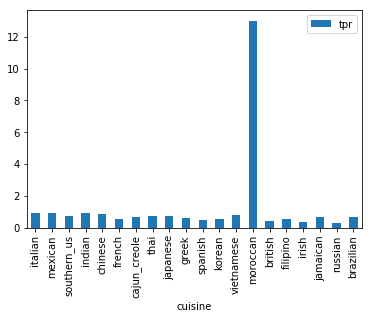

In [315]:
tpr_df.set_index('cuisine').plot(kind='bar')

In [329]:
tpr_df.sort_values('tpr')['cuisine']

18         russian
16           irish
14         british
10         spanish
15        filipino
5           french
11          korean
9            greek
17        jamaican
6     cajun_creole
19       brazilian
8         japanese
7             thai
2      southern_us
12      vietnamese
4          chinese
13        moroccan
3           indian
0          italian
1          mexican
Name: cuisine, dtype: object

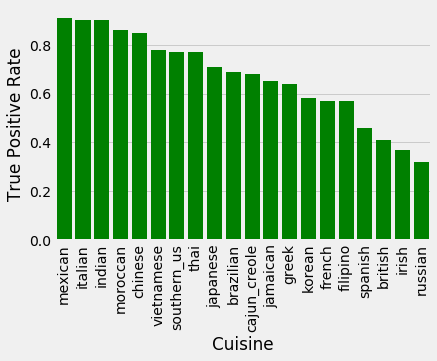

In [349]:
plt.style.use('fivethirtyeight')
sns.barplot(data=tpr_df, 
            x='Cuisine', 
            y='True Positive Rate', 
            order = tpr_df.sort_values('tpr', ascending = False)['cuisine'],
            color = 'green',
            saturation = 20)
plt.xticks(rotation=90)
plt.title = 'True Positive Rate by Cuisine'
plt.figsize = 40
plt.ycaption='ss'

In [337]:
tpr_df.sort_values('tpr', ascending=False)

,cuisine,tpr
1,mexican,0.91
0,italian,0.90
3,indian,0.90
13,moroccan,0.86
4,chinese,0.85
12,vietnamese,0.78
2,southern_us,0.77
7,thai,0.77
8,japanese,0.71
19,brazilian,0.69


Build a dataframe showing the number of each type of correct and incorrect classification

In [214]:
predictions = pd.DataFrame(y_test)

In [215]:
predictions['y_pred'] = preds

In [277]:
c_dict = {
    0:'italian',
    1:'mexican',
    2:'southern_us',
    3:'indian',
    4:'chinese',
    5:'french',
    6:'cajun_creole',
    7:'thai',
    8:'japanese',
    9:'greek',
    10:'spanish',
    11:'korean',
    12:'vietnamese',
    13:'moroccan',
    14:'british',
    15:'filipino',
    16:'irish',
    17:'jamaican',
    18:'russian',
    19:'brazilian'
}

In [248]:
predictions.head()

,y,y_pred
17878,3,3
18898,2,2
34,0,0
21309,7,12
26617,0,0


In [ ]:
predictions['actual']=''
predictions['predicted']=''

In [254]:
for i, row in predictions.iterrows():
    predictions.loc[i,'actual'] =c_dict[predictions.loc[i]['y']]
    predictions.loc[i,'predicted'] =c_dict[predictions.loc[i]['y_pred']]

In [255]:
predictions.head()

,y,y_pred,actual,predicted
17878,3,3,indian,indian
18898,2,2,southern_us,southern_us
34,0,0,italian,italian
21309,7,12,thai,vietnamese
26617,0,0,italian,italian


In [293]:
for key in c_dict:
    print(c_dict[key])
    print(str(predictions[predictions.actual==c_dict[key]].shape[0]), 'total')
    print(str(tpr_dict[c_dict[key]]), 'pct correct')
    print(predictions[predictions.actual==c_dict[key]].predicted.value_counts())

italian
759 total
0.9 pct correct
italian         682
french           25
southern_us      17
greek            10
mexican           5
indian            5
spanish           3
british           3
moroccan          2
chinese           2
brazilian         1
japanese          1
filipino          1
russian           1
cajun_creole      1
Name: predicted, dtype: int64
mexican
675 total
0.91 pct correct
mexican         615
italian          18
southern_us      16
french            6
indian            3
greek             2
spanish           2
british           2
filipino          2
chinese           2
cajun_creole      2
brazilian         1
vietnamese        1
japanese          1
jamaican          1
russian           1
Name: predicted, dtype: int64
southern_us
452 total
0.77 pct correct
southern_us     347
french           21
italian          20
cajun_creole     19
mexican          17
russian           7
greek             5
british           4
filipino          4
thai              2
moroccan    

In [301]:
for key in c_dict:
    print(c_dict[key])
    print(predictions[predictions.actual==c_dict[key]].shape[0])
    print(predictions[predictions.actual==c_dict[key]].predicted.value_counts().head(10))

italian
759
italian        682
french          25
southern_us     17
greek           10
mexican          5
indian           5
spanish          3
british          3
moroccan         2
chinese          2
Name: predicted, dtype: int64
mexican
675
mexican        615
italian         18
southern_us     16
french           6
indian           3
greek            2
spanish          2
british          2
filipino         2
chinese          2
Name: predicted, dtype: int64
southern_us
452
southern_us     347
french           21
italian          20
cajun_creole     19
mexican          17
russian           7
greek             5
british           4
filipino          4
thai              2
Name: predicted, dtype: int64
indian
303
indian         273
mexican          6
italian          5
southern_us      4
chinese          4
jamaican         3
brazilian        2
moroccan         2
japanese         1
greek            1
Name: predicted, dtype: int64
chinese
269
chinese        229
japanese         9
thai     